In [1]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Automatically created module for IPython interactive environment


In [ ]:
np.random.seed(42)

iris = datasets.load_iris()
print iris.data.shape
print iris.target.shape

data = scale(iris.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(iris.target))
print iris.target

print np.unique(iris.target)
labels = iris.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

In [ ]:
from sklearn import svm
clf=svm.LinearSVC()
# learn from existing data using estimator called fit(x,y)
clf.fit(iris.data,iris.target)

In [ ]:
# use model to predict most likely outcome on unseen data

clf.predict([[5.0,3.6,1.3,0.25]])
clf.coef_ #access parameters of model via attributes

In [ ]:
# classification:

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data,iris.target)

knn.predict([[0.1,0.2,0.3,0.4]])

In [ ]:
perm = np.random.permutation(iris.target.size)
iris.data = iris.data[perm]
iris.target = iris.target[perm]
knn.fit(iris.data[:100],iris.target[:100])

knn.score(iris.data[100:],iris.target[100:])

In [ ]:
#K-mean clustering:

from sklearn import cluster,datasets
iris = datasets.load_iris()
k_means = cluster.KMeans(3) #three parameters
k_means.fit(iris.data)

print k_means.labels_[::10]
print iris.target[::10]

In [ ]:
print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

In [ ]:
import numpy as np
from sklearn import cross_validation, datasets, decomposition, svm
import glob
%matplotlib inline
# ..
# .. load data ..


spiders = glob.glob('./Spider/*')
# print spiders
fnlist = []
fnlist[0:len(spiders)-1] = spiders[:]
print np.shape(fnlist)
# print spiders[:]

img = []
for i in range(0,len(spiders)):
    img.append(mpimg.imread(spiders[i]))
    

from sklearn import cluster,datasets
n_samples = len(img)
for i in img:
    data = i.reshape((n_samples, -1))

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)
faces = np.reshape(lfw_people.data, (lfw_people.target.shape[0], -1))
train, test = iter(cross_validation.StratifiedKFold(lfw_people.target, k=4)).next()
X_train, X_test = faces[train], faces[test]
y_train, y_test = lfw_people.target[train], lfw_people.target[test]

# ..
# .. dimension reduction ..
# pca = decomposition.RandomizedPCA(n_components=150, whiten=True)
# pca.fit(X_train)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

# # ..
# # .. classification ..
# clf = svm.SVC(C=5., gamma=0.001)
# clf.fit(X_train_pca, y_train)

# print 'Score on unseen data: '
# print clf.score(X_test_pca, y_test)

In [2]:


import  sklearn as sk
import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
%matplotlib inline
# from sklearn.neural_network import MLPClassifier

spiders = glob.glob('./Spider/*')
non_spiders = glob.glob('./NonSpider/*')

SPimg = []
for sp in spiders:
    img = Image.open(sp)
#     resized = scipy.misc.imresize(img,[60,60])
    SPimg.append(img)

NSPimg = []
for sp in non_spiders:
    img = Image.open(sp)
    resized = scipy.misc.imresize(img,[60,60])
    NSPimg.append(resized)



<class 'PIL.JpegImagePlugin.JpegImageFile'>


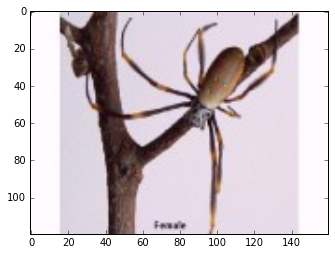

In [3]:
plt.imshow(SPimg[19])
print type(SPimg[19])

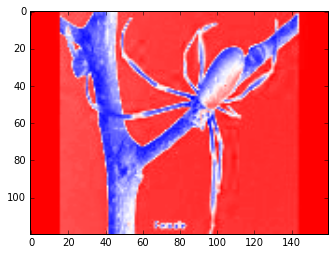

In [9]:
lum_img = np.array(SPimg[19])

plt.imshow(lum_img[:,:,0],cmap='bwr')
plt.savefig("tessstttyyy.png",dpi=100)
plt.show()

IndexError: too many indices for array

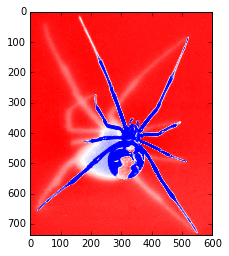

In [13]:
from PIL import Image
import os

folderNames = {"Spider", "NonSpider", "BigSpiders", "topdown"}
thresholdLow = 150
thresholdHigh = 255

for folderName in folderNames :
    if (not os.path.isdir('Edited' + folderName)) :
        os.makedirs('Edited' + folderName)
    count = 0
    for fileName in os.listdir(folderName) :
        image = Image.open(folderName + "/"+fileName)
        lum_img = np.array(image)
        plt.imshow(lum_img[:,:,0],cmap='bwr')
        plt.savefig("Edited" + folderName +"/"+fileName,dpi=100)

In [ ]:
testSize = int(0.75*len(SPimg)) + int(0.75*len(NSPimg))
checkSpid = int(0.25*len(SPimg))
checkNSpid = int(0.25*len(NSPimg))
testLabs = np.zeros(testSize)

testImgs = SPimg[0:int(0.75*len(SPimg))]

for i in range(0,int(0.75*len(SPimg))):
    testLabs[i] = 1
# testLabs = np.ones(int(0.75*len(SPimg)))

testImgs[len(testImgs):(len(testImgs)+(int)(0.75*len(NSPimg)))] = SPimg[0:(int)(0.75*len(NSPimg))]
toAloc = -1*np.ones(int(0.75*len(NSPimg)))

for i in range(int(0.75*len(NSPimg)),(len(testImgs)-2)):
    testLabs[i] = -1

testImgs = np.array(testImgs)
TwoDim_dataset = testImgs.reshape(testSize,-1)

#

knn = neighbors.KNeighborsClassifier()
knn.fit(TwoDim_dataset,testLabs)


# print testSP
# blah=[]

# for i in testSP:
#     blah1=[]
#     for j in i:
#         blah1.append(j)
#     blah.append(blah1)
# print testSP
# print blah

# blah = np.array(blah)
print len(SPimg)
# testSP = SPimg[int(0.75*len(SPimg)):230]
testSP = NSPimg[int(0.75*len(NSPimg)):len(NSPimg)]
print 0.75*len(SPimg)
check = np.array(testSP)

TwoDtestSP=check.reshape(len(NSPimg)-int(0.75*len(NSPimg)),-1)

knn.predict(TwoDtestSP)

# knn.score(TwoDtestSP)




# np.squeeze(x, axis=(2,)).shape
# (1, 3)
# check=np.array(testSP)
# check=[item for sublist in x for item in sublist]
# # TwoDtestSP = check.reshape(checkSpid,-1)

# knn.predict(check)
#Now for a single layer perceptron with 3 nodes in the hidden layer
# SLPClass = MLPClassifier(hidden_layer_sizes=(3,))
# SLPClass.fit(TwoDim_dataset,testLabs)

# print SLPClass.loss_
# testSP = np.array(SPimg[(int)(0.75*len(SPimg))+1:-1])
# testSP = testSP.reshape(checkSpid,-1)
# testSLPSPScore = SLPClass.score(testSP,np.ones(len(testSP)))
# print "Testing the SLP on spiders " , testSLPSPScore
#
# testNSP = NSPimg[(int)(0.75*len(NSPimg))+1:-1]
#
# # testNSLPSPScore = SLPClass.score(testNSP,np.ones(len(testNSP)))
# print "Testing the SLP on non-spiders " , testNSLPSPScore

In [ ]:
knn.predict_proba(TwoDtestSP)


In [ ]:

plt.imshow(SPimg[int(213.5)+2])